## Assignment 1

### 01: Assessment of Data and Applying Normalization

The following libraries have been used: NumPy, Pandas, random, Seaborn, matplotlib, Scikit-learn, imblearn, and collections

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier

The wine dataset has two separate files for different colors of wine:
1. Dataset with red wine information contains $1599$ records with $12$ features
2. Dataset with white wine information contains $4898$ records with $12$ features

In [ ]:
#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()

# adding color info as a column
C = 'color'
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])


In [ ]:
wine_r.shape, wine_w.shape

((1599, 13), (4898, 13))

In [ ]:
# join the dataframes
datasets = [wine_r, wine_w]
wine_data = pd.concat(datasets)

# checking random rows
wine_data.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
507             6.0              0.24         0.27             1.9      0.048   
2552            6.6              0.36         0.52            11.3      0.046   
3735            6.1              0.22         0.46             1.8      0.160   
801             6.0              0.28         0.49             6.8      0.048   
843             6.9              0.19         0.35             1.7      0.036   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
507                  40.0                 170.0  0.99380  3.64       0.54   
2552                  8.0                 110.0  0.99660  3.07       0.46   
3735                 34.0                  74.0  0.98840  3.19       0.33   
801                  61.0                 222.0  0.99530  3.19       0.47   
843                  33.0                 101.0  0.99315  3.21       0.54   

      alcohol  quality  color  
507      10.0        7    0.0  
2552      9.4        5    0.0  
3735     13.4        6    0.0  
801       9.3        5    0.0  
843      10.8        7    0.0

In [ ]:
# checking if there are any duplicated rows
wine_data.duplicated().all()

False

1. Missing value : It has been checked after concatenating the dataset if there are any missing values by using df.isnull().sum(), there aren't any.

In [ ]:
# checking if any null value
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

2. To compute the moments or summarization statistics on the data features df.describe() method have been used.
* Outliers : Extreme Values in Residual Sugar, Sulfur Dioxide, Chlorides, & Citric Acid
* Skewed Distributions: Residual Sugar has a wide range (0.6 to 65.8), Total Sulfur Dioxide (6 to 440) varies widely

In [ ]:
# generating descriptive statistics
stats_wine = wine_data.describe()

variance = pd.DataFrame([wine_data.var()])
variance = variance.rename(index = {0:"variance"})

median = pd.DataFrame([wine_data.median()])
median = median.rename(index = {0:"median"})

skew = pd.DataFrame([wine_data.skew()])
skew = skew.rename(index = {0:"skew"})

kurtosis = pd.DataFrame([wine_data.kurtosis()])
kurtosis = kurtosis.rename(index = {0:"kurtosis"})
stats_wine = pd.concat([stats_wine, variance, median, skew, kurtosis])
stats_wine = stats_wine.drop("color", axis = 1)
stats_wine

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       6497.000000       6497.000000  6497.000000     6497.000000   
mean           7.215307          0.339666     0.318633        5.443235   
std            1.296434          0.164636     0.145318        4.757804   
min            3.800000          0.080000     0.000000        0.600000   
25%            6.400000          0.230000     0.250000        1.800000   
50%            7.000000          0.290000     0.310000        3.000000   
75%            7.700000          0.400000     0.390000        8.100000   
max           15.900000          1.580000     1.660000       65.800000   
variance       1.680740          0.027105     0.021117       22.636696   
median         7.000000          0.290000     0.310000        3.000000   
skew           1.723290          1.495097     0.471731        1.435404   
kurtosis       5.061161          2.825372     2.397239        4.359272   

            chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count     6497.000000          6497.000000           6497.000000  6497.000000   
mean         0.056034            30.525319            115.744574     0.994697   
std          0.035034            17.749400             56.521855     0.002999   
min          0.009000             1.000000              6.000000     0.987110   
25%          0.038000            17.000000             77.000000     0.992340   
50%          0.047000            29.000000            118.000000     0.994890   
75%          0.065000            41.000000            156.000000     0.996990   
max          0.611000           289.000000            440.000000     1.038980   
variance     0.001227           315.041192           3194.720039     0.000009   
median       0.047000            29.000000            118.000000     0.994890   
skew         5.399828             1.220066             -0.001177     0.503602   
kurtosis    50.898051             7.906238             -0.371664     6.606067   

                   pH    sulphates      alcohol      quality  
count     6497.000000  6497.000000  6497.000000  6497.000000  
mean         3.218501     0.531268    10.491801     5.818378  
std          0.160787     0.148806     1.192712     0.873255  
min          2.720000     0.220000     8.000000     3.000000  
25%          3.110000     0.430000     9.500000     5.000000  
50%          3.210000     0.510000    10.300000     6.000000  
75%          3.320000     0.600000    11.300000     6.000000  
max          4.010000     2.000000    14.900000     9.000000  
variance     0.025853     0.022143     1.422561     0.762575  
median       3.210000     0.510000    10.300000     6.000000  
skew         0.386839     1.797270     0.565718     0.189623  
kurtosis     0.367657     8.653699    -0.531687     0.232322

3. A pairsplot to look at the whole of the dataset.

In [ ]:
# plotting the features
sns.pairplot(wine_data, hue= 'color', diag_kind="hist", height= 2)


Output hidden; open in https://colab.research.google.com to view.

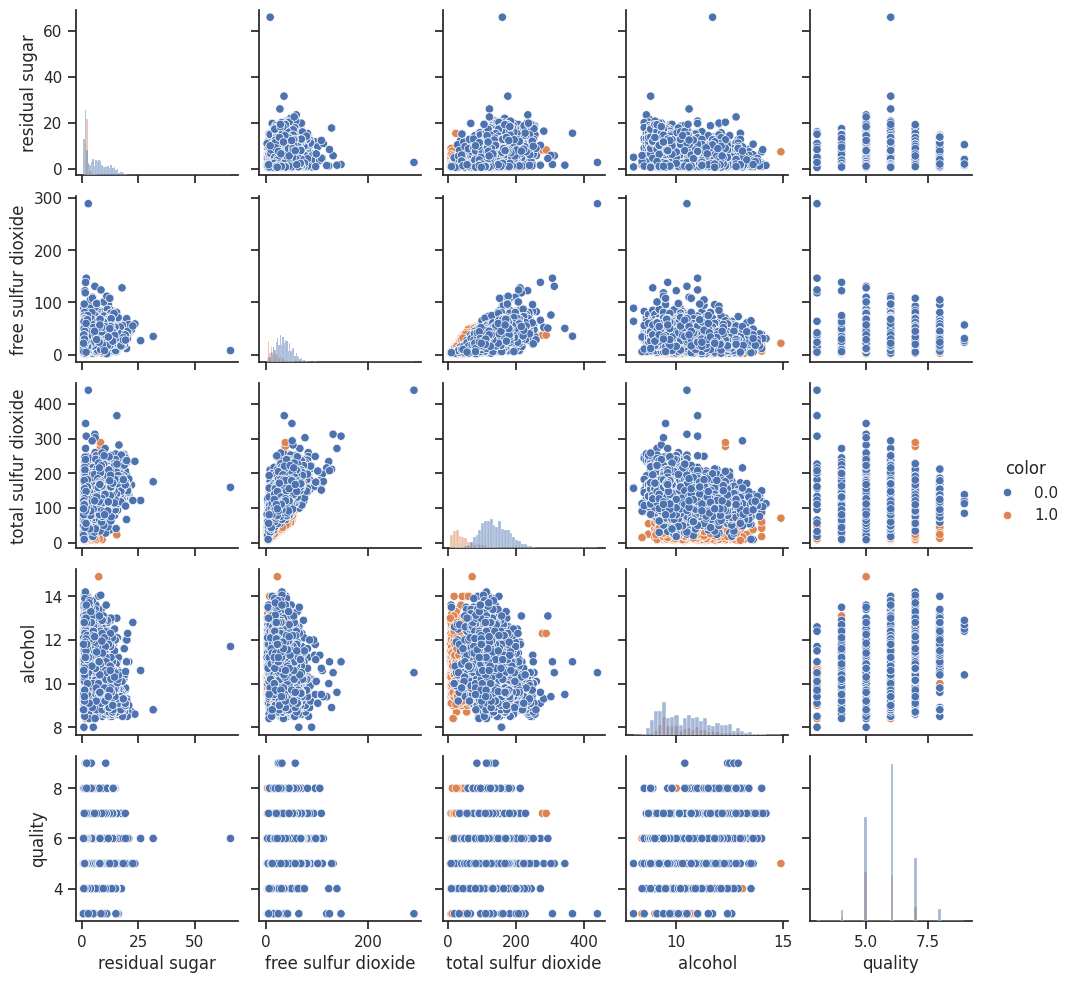

In [ ]:
subset_features = ['residual sugar', 'free sulfur dioxide','total sulfur dioxide', 'alcohol', 'quality', 'color']
sns.pairplot(wine_data[subset_features], diag_kind="hist", hue = 'color', height= 2)
# plt.savefig('Subset_pairplor.png')

From the df.describe() output it is evident that the dataset is not a balanced one.

1. The mean of color is 0.246 with a standard deviation of 0.43.
2. Since color is binary (likely 0 = red, 1 = white), this suggests that only ~25% of the wines are red, while ~75% are white.
3. This indicates a class imbalance because one class (white wines) is much more frequent than the other (red wines).

To ensure better model performance, we can apply class balancing techniques, such as :

* Undersampling (Reduce Majority Class) - Randomly remove some samples from the majority class (white wines) to balance with the minority class (red wines).
* Oversampling (Increase Minority Class) - Randomly duplicate or synthetically generate more samples from the minority class (red wines).

In this approach the undersmpling method have been chosen.

### 02: Classiﬁcation with KNN

In [ ]:
X = wine_data.drop(columns=['color'])
y = wine_data['color']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply Random Undersampling (only on the training set)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Standardize the feature values (Z-score normalization)
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler


print(sorted(Counter(y_train_resampled).items()))


[(0.0, 1279), (1.0, 1279)]


1. The default parameters of the model has been used to train and test the data. An accuracy of $99\%$ is seen.

In [ ]:
# Initialize and train KNN classifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on test data
y_pred = knn_default.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       980
         1.0       0.97      0.99      0.98       320

    accuracy                           0.99      1300
   macro avg       0.98      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



A range of values has been chosen for the k parameter to perform the 5-fold cross validation on the training data. The best k value obtained from the process is $12$.

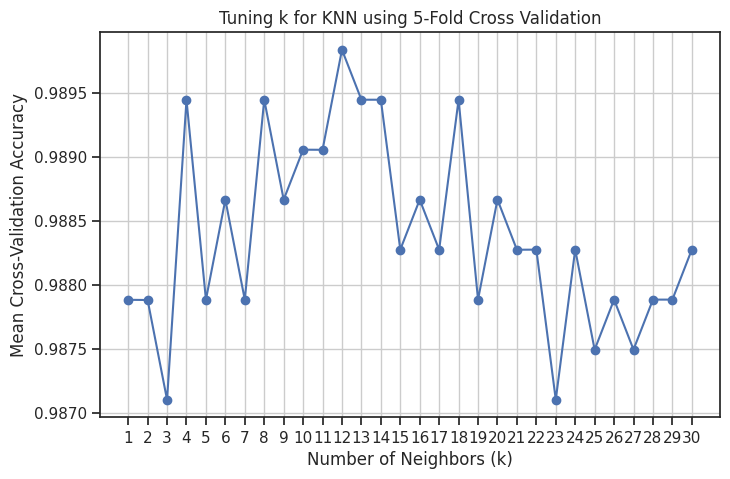

In [ ]:
# Finding the best 'k' using 5-fold Cross-Validation

k_values = range(1, 31)  # Test k from 1 to 30
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_resampled_scaled, y_train_resampled, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())  # Store mean accuracy for this k

# Plot mean validation accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("Tuning k for KNN using 5-Fold Cross Validation")
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
# Find the best k (with the highest validation accuracy)
best_k = k_values[np.argmax(cv_scores)]
print(f"\nBest k found: {best_k} with mean validation accuracy of {max(cv_scores):.4f}")



Best k found: 12 with mean validation accuracy of 0.9898


The best value of k has been used for the training data and the accuracy calculated on the held out tes set is obtained $0.9938$.

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_resampled_scaled, y_train_resampled)

# Evaluate on test set
y_pred_best = knn_best.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nFinal KNN (k={best_k}) Test Accuracy: {accuracy_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



Final KNN (k=12) Test Accuracy: 0.9938

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       980
         1.0       0.98      0.99      0.99       320

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



To improve the result weighted KNN is used, however, no improvement from the previous values has been seen.

In [ ]:
# improving with Weighted KNN
knn_weighted = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_weighted.fit(X_train_resampled_scaled, y_train_resampled)

# Evaluate on test set
y_pred_weighted = knn_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"\nWeighted KNN (k={best_k}, weights='distance') Test Accuracy: {accuracy_weighted:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))



Weighted KNN (k=12, weights='distance') Test Accuracy: 0.9938

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       980
         1.0       0.98      0.99      0.99       320

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



### 03: Decision Trees Classiﬁer

A range of maximum depth parameter for the tree has been used to extract the best max_depth parameter for the Decision Tree classifier. The best depth has been obtained to be 11.


Best max_depth: 11 with Cross-Validation Accuracy: 0.9765


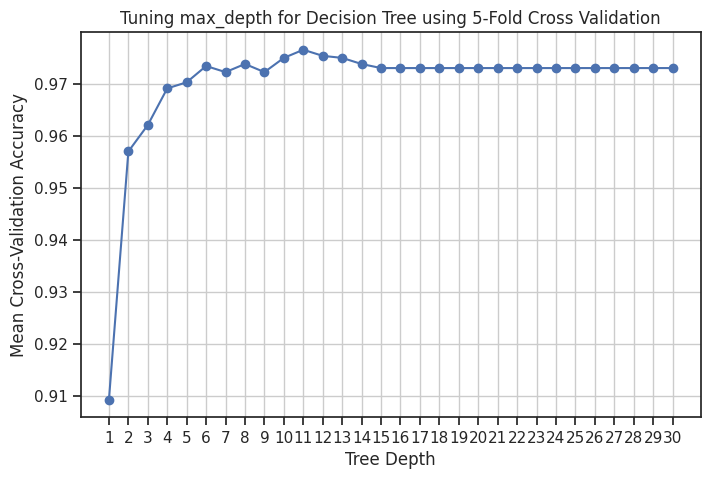

In [ ]:
param_grid = {'max_depth': range(1, 31)}  # Testing tree depth from 1 to 30
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

# Get results
best_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_
print(f"\nBest max_depth: {best_depth} with Cross-Validation Accuracy: {best_score:.4f}")

# Plot mean accuracy vs. max_depth
depths = list(range(1, 31))
cv_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(depths, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Tree Depth")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("Tuning max_depth for Decision Tree using 5-Fold Cross Validation")
plt.xticks(depths)
plt.grid()
plt.show()


The classifier has been used to predict the color of the wine, an accuracy od 0.9138 has been obtained.

In [ ]:
dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_best.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred_best = dt_best.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nFinal Decision Tree (max_depth={best_depth}) Test Accuracy: {accuracy_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Final Decision Tree (max_depth=11) Test Accuracy: 0.9138

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       980
         1.0       0.85      0.79      0.82       320

    accuracy                           0.91      1300
   macro avg       0.89      0.87      0.88      1300
weighted avg       0.91      0.91      0.91      1300



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Visualizing the tree.

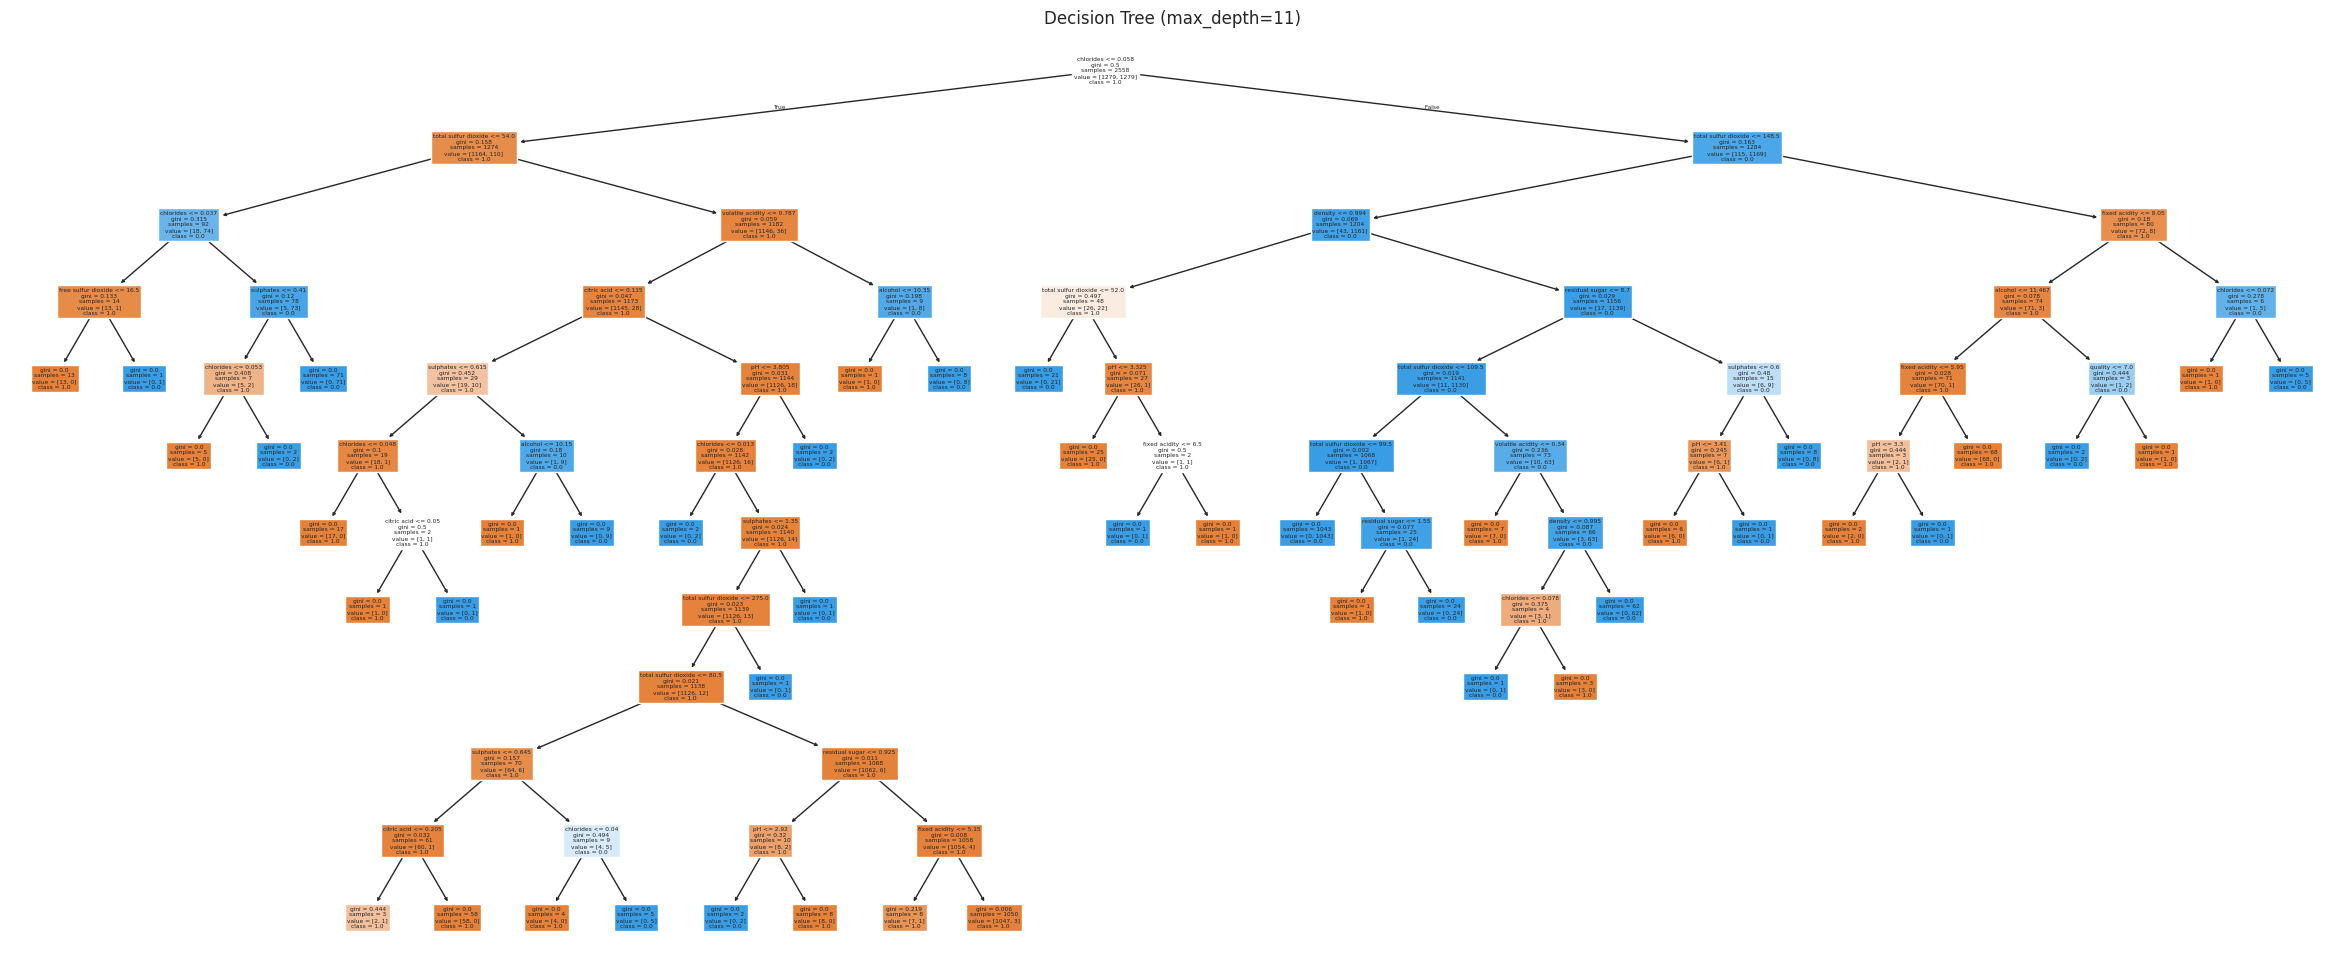

In [ ]:
plt.figure(figsize=(30, 12))
plot_tree(dt_best, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.title(f"Decision Tree (max_depth={best_depth})")
plt.show()

Text view of the tree-splitting can be used to look deep into the features that have been considered for the classification.

In [ ]:
tree_rules = export_text(dt_best, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- chlorides <= 0.06
|   |--- total sulfur dioxide <= 54.00
|   |   |--- chlorides <= 0.04
|   |   |   |--- free sulfur dioxide <= 16.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- free sulfur dioxide >  16.50
|   |   |   |   |--- class: 1.0
|   |   |--- chlorides >  0.04
|   |   |   |--- sulphates <= 0.41
|   |   |   |   |--- chlorides <= 0.05
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- chlorides >  0.05
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- sulphates >  0.41
|   |   |   |   |--- class: 1.0
|   |--- total sulfur dioxide >  54.00
|   |   |--- volatile acidity <= 0.79
|   |   |   |--- citric acid <= 0.11
|   |   |   |   |--- sulphates <= 0.62
|   |   |   |   |   |--- chlorides <= 0.05
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- chlorides >  0.05
|   |   |   |   |   |   |--- citric acid <= 0.05
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- citric acid >  0.05
|   |   |   |   |   |   

In [ ]:
export_graphviz(dt_best, out_file= 'tree.dot', feature_names= X.columns, class_names=['Red', 'White'])

#### Interpretation:

* The tree-splitting rules show that chlorides, sulfur dioxide, citric acid, and alcohol have been used to classify samples 0 and 1. The root decision starts with chlorides ≤ 0.06, meaning the dataset is first split based on this threshold.
* If chlorides ≤ 0.06, further splits occur based on total sulfur dioxide, free sulfur dioxide, and sulphates. If chlorides > 0.06, other factors like density, residual sugar, and alcohol become key decision points.
* Chlorides, sulfur dioxide (both total and free), citric acid, volatile acidity, alcohol, sulphates, pH, and residual sugar frequently appear in the tree, suggesting these features have a strong influence on the classification outcome.
* The tree has many levels, indicating a deep tree that may have a risk of overfitting (if not pruned or regularized). This depth means the model is capturing fine details but may lack generalization for new data.

### 4: Random Forest Classiﬁer

A 5-fold cross validation has been performed to find the best maximum depth of the trees and number of trees parameter for the Random Forest Classifier.

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [3, 10, 50, 100, 200],  # Number of trees
    'max_depth': [2, 3, 5, 10, 20]         # Tree depth
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9922


Mean accuracy vs the above parameter settings have been plotted. From the ehatmap we can see the maximum depth of the tree 10 and the no of trees are 50.

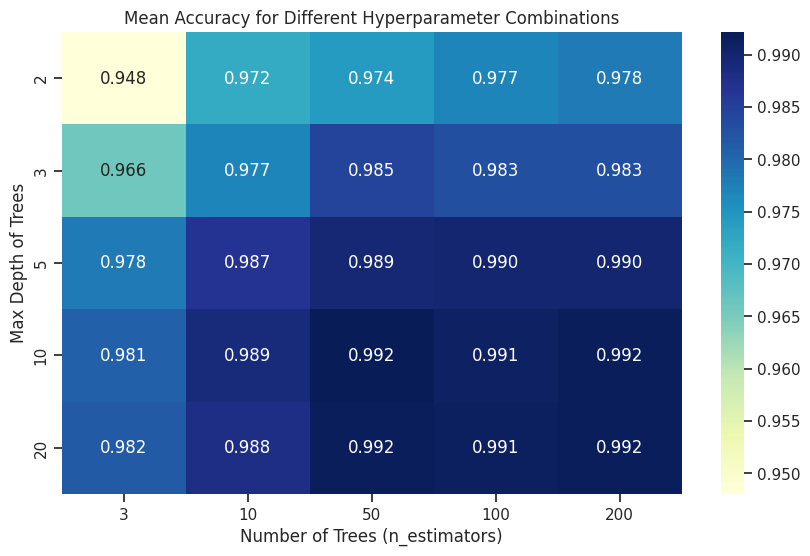

In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth of Trees")
plt.title("Mean Accuracy for Different Hyperparameter Combinations")
plt.show()

The classification with the best parameters give the accuracy of $0.9946$

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9946


# Abalone Dataset

# 1. Assessment of Data and Applying Normalization

In [2]:
#Load dataset
abalone_columns = ["Sex", "Length","Diameter", "Height", "Whole_weight", "Shucked_weight","Viscera_weight","Shell_weight","Rings"]
abalone = pd.read_csv("abalone.csv",  header = None, names = abalone_columns)

features = ["Sex", "Length","Diameter", "Height", "Whole_weight", "Shucked_weight","Viscera_weight","Shell_weight"]
numerical_features = ["Length","Diameter", "Height", "Whole_weight", "Shucked_weight","Viscera_weight","Shell_weight"]

In [3]:
abalone.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
classes = np.sort(abalone["Rings"].unique())
num_classes = len(classes)

There is no missing data

In [5]:
#Check for missing data:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
#Statistics for the abalone dataset features
stats = abalone.describe()
stats = stats.drop("Rings", axis =1)

variance = pd.DataFrame([abalone[numerical_features].var()])
variance = variance.rename(index = {0:"variance"})

median = pd.DataFrame([abalone[numerical_features].median()])
median = median.rename(index = {0:"median"})

skew = pd.DataFrame([abalone[numerical_features].skew()])
skew = skew.rename(index = {0:"skew"})

kurtosis = pd.DataFrame([abalone[numerical_features].kurtosis()])
kurtosis = kurtosis.rename(index = {0:"kurtosis"})

stats = pd.concat([stats, variance, median, skew, kurtosis])
stats

Length     Diameter       Height  Whole_weight  Shucked_weight  \
count     4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean         0.523992     0.407881     0.139516      0.828742        0.359367   
std          0.120093     0.099240     0.041827      0.490389        0.221963   
min          0.075000     0.055000     0.000000      0.002000        0.001000   
25%          0.450000     0.350000     0.115000      0.441500        0.186000   
50%          0.545000     0.425000     0.140000      0.799500        0.336000   
75%          0.615000     0.480000     0.165000      1.153000        0.502000   
max          0.815000     0.650000     1.130000      2.825500        1.488000   
variance     0.014422     0.009849     0.001750      0.240481        0.049268   
median       0.545000     0.425000     0.140000      0.799500        0.336000   
skew        -0.639873    -0.609198     3.128817      0.530959        0.719098   
kurtosis     0.064621    -0.045476    76.025509     -0.023644        0.595124   

          Viscera_weight  Shell_weight  
count        4177.000000   4177.000000  
mean            0.180594      0.238831  
std             0.109614      0.139203  
min             0.000500      0.001500  
25%             0.093500      0.130000  
50%             0.171000      0.234000  
75%             0.253000      0.329000  
max             0.760000      1.005000  
variance        0.012015      0.019377  
median          0.171000      0.234000  
skew            0.591852      0.620927  
kurtosis        0.084012      0.531926

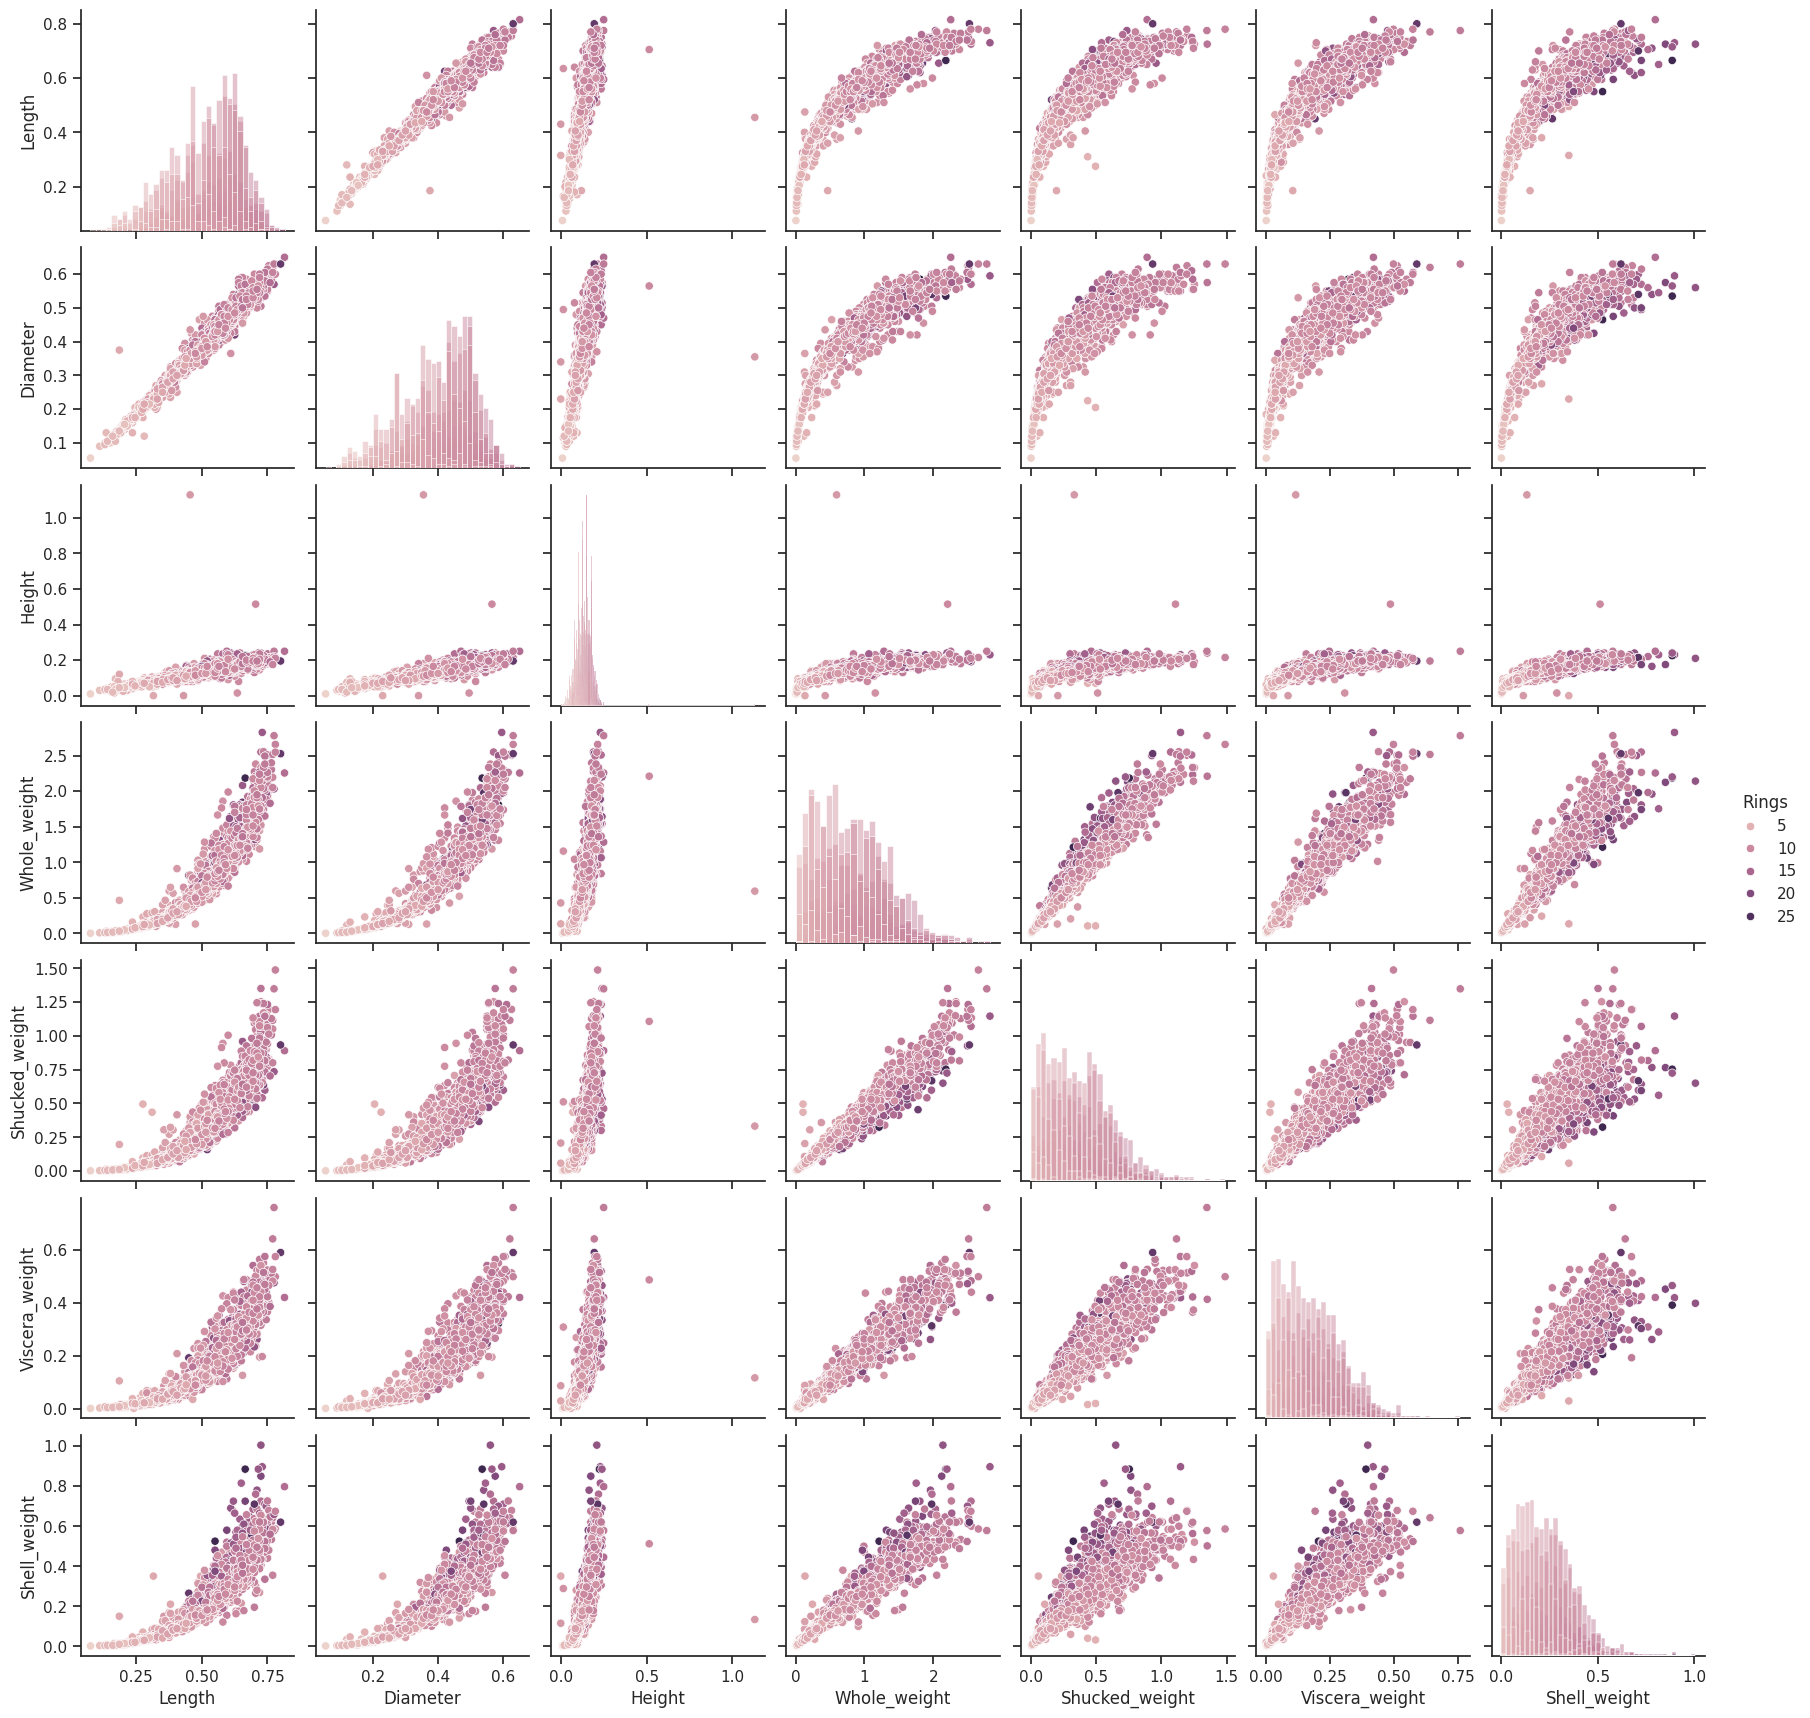

In [7]:
#Visualize the features with pairplot
sns.pairplot(abalone, hue = "Rings", diag_kind = "hist")

In [8]:
#One hot encode the categorical column
abalone = pd.get_dummies(abalone, columns = ["Sex"], dtype = "int")

In [9]:
abalone

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500     15      0      0      1  
1           0.0700      7      0      0      1  
2           0.2100      9      1      0      0  
3           0.1550     10      0      0      1  
4           0.0550      7      0      1      0  
...            ...    ...    ...    ...    ...  
4172        0.2490     11      1      0      0  
4173        0.2605     10      0      0      1  
4174        0.3080      9      0      0      1  
4175        0.2960     10      1      0      0  
4176        0.4950     12      0      0      1  

[4177 rows x 11 columns]

Viewing class imbalance: This is not a balanced dataset because the number of samples for each class varies greatly.

In [10]:
#Viewing number of samples per class
class_frequencies = abalone["Rings"].value_counts()
class_frequencies

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [11]:
#sort in ring order
class_frequencies_sorted = class_frequencies.sort_index()

#New class balance using class 0: [1,8], class 1: [9,10], class 2: [11,29]
print("Number of samples in class 0 if grouped:", class_frequencies_sorted.iloc[0:8].sum())
print("Number of sampels in class 1 if grouped:", class_frequencies_sorted.iloc[8:10].sum())
print("Number of samples in class 2 if grouped:", class_frequencies_sorted.iloc[10:29].sum())

Number of samples in class 0 if grouped: 1407
Number of sampels in class 1 if grouped: 1323
Number of samples in class 2 if grouped: 1447


As mentioned in the abalone.names file, in the paper "A Quantitative Comparison of Dystal and Backpropagation", classes are grouped as follows: classes 1 to 8 together, classes 9 and 10 together, and classes 11 to 29 together [1][2]. This will be the approach taken here, as this provides a better balance of samples per class. The new classes will be referred to as class 0, class 1 and class 2. The results of grouping classes (the correction) will be presented after the results from using the dataset with the original classes as-is.

In [12]:
# Reference used: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/ [3]

condition_on_rings = [abalone["Rings"] <=8 , (abalone["Rings"]==9)|(abalone["Rings"]==10), abalone["Rings"]>=11]
new_class_vals = [0,1,2]

#Create copy of abalone dataset
abalone_grouped = abalone

abalone_grouped["Ring_class"] = np.select(condition_on_rings, new_class_vals)
abalone_grouped = abalone_grouped.drop("Rings", axis = 1)
abalone_grouped

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Sex_F  Sex_I  Sex_M  Ring_class  
0           0.1500      0      0      1           2  
1           0.0700      0      0      1           0  
2           0.2100      1      0      0           1  
3           0.1550      0      0      1           1  
4           0.0550      0      1      0           0  
...            ...    ...    ...    ...         ...  
4172        0.2490      1      0      0           2  
4173        0.2605      0      0      1           1  
4174        0.3080      0      0      1           1  
4175        0.2960      1      0      0           1  
4176        0.4950      0      0      1           2  

[4177 rows x 11 columns]

In [13]:
#Number of samples in each new class
abalone_grouped["Ring_class"].value_counts()

Ring_class
2    1447
0    1407
1    1323
Name: count, dtype: int64

Split into train test

In [14]:
#Split into train and test set
X = abalone.drop("Rings", axis = 1)
y = abalone["Rings"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 10)

In [15]:
#Steps for standardization

#Take numerical features only
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

#Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

#Recombine with the categorical (one-hot encoded) columns
X_train = np.hstack((X_train_scaled, X_train[["Sex_F",	"Sex_I",	"Sex_M"]].to_numpy() ))
X_test = np.hstack((X_test_scaled, X_test[["Sex_F",	"Sex_I",	"Sex_M"]].to_numpy() ))

In [16]:
#####################################################################################
#Repeat the same preprocessing steps with the abalone dataset with grouped classes (refer to it as abalone_grouped, with features x_grouped and target y_grouped)
#Split into train and test set
X_grouped = abalone_grouped.drop("Ring_class", axis = 1)
y_grouped = abalone_grouped["Ring_class"]

X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped = train_test_split(X_grouped,y_grouped, train_size = 0.8, random_state = 10)

X_train_grouped_numerical = X_train_grouped[numerical_features]
X_test_grouped_numerical = X_test_grouped[numerical_features]

#Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_grouped_scaled = scaler.fit_transform(X_train_grouped_numerical)
X_test_grouped_scaled = scaler.transform(X_test_grouped_numerical)

#Recombine with the categorical (one-hot encoded) columns
X_train_grouped = np.hstack((X_train_grouped_scaled, X_train_grouped[["Sex_F",	"Sex_I",	"Sex_M"]].to_numpy() ))
X_test_grouped = np.hstack((X_test_grouped_scaled, X_test_grouped[["Sex_F",	"Sex_I",	"Sex_M"]].to_numpy() ))

# 2. Classification with KNN using unbalanced dataset

In [17]:
#Train the model with the default parameters using the abalone dataset classes as-is
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print("Test accuracy with default parameters: ", test_acc)

Test accuracy with default parameters:  0.2069377990430622


In [ ]:
#Using 5-fold cross validation, testing different values for parameter k

k_list = [i for i in range(1,31)]
scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    fold_scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = "accuracy")

    scores.append(np.mean(fold_scores))

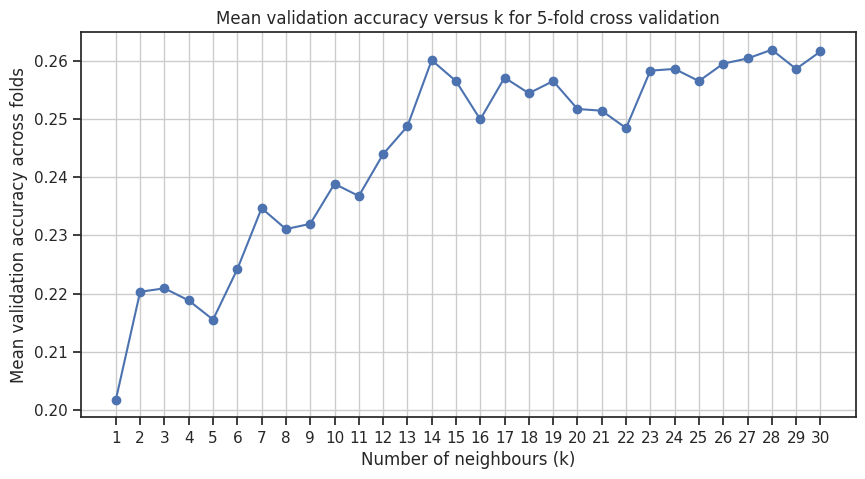

In [19]:
#Plot the results
plt.figure(figsize= (10,5))
plt.title("Mean validation accuracy versus k for 5-fold cross validation")
plt.plot(k_list,scores, marker = 'o')
plt.xlabel("Number of neighbours (k)")
plt.ylabel("Mean validation accuracy across folds")
plt.xticks(k_list)
plt.grid()
plt.show()

In [20]:
#Retrain KNN using the best k found
best_k = k_list[np.argmax(scores)]

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print("Best k value found with 5-fold cross validation: k =", best_k)
print("Test accuracy with k =",best_k, ": ", test_acc)

Best k value found with 5-fold cross validation: k = 28
Test accuracy with k = 28 :  0.2535885167464115


In [21]:
#Weighted KNN
weighted_knn = KNeighborsClassifier(n_neighbors = best_k, weights = "distance")
weighted_knn.fit(X_train, y_train)
test_acc = weighted_knn.score(X_test, y_test)

print("Test accuracy using weighted KNN with k =", best_k, ":", test_acc)

Test accuracy using weighted KNN with k = 28 : 0.24401913875598086


# 2. Repeat the above KNN experiments using the dataset with grouped classes

In [22]:
#Train the model with the default parameters using the abalone dataset with grouped classes
knn = KNeighborsClassifier()
knn.fit(X_train_grouped, y_train_grouped)
test_acc = knn.score(X_test_grouped, y_test_grouped)

print("Test accuracy with default parameters for the dataset with grouped classes: ", test_acc)

Test accuracy with default parameters for the dataset with grouped classes:  0.611244019138756


In [23]:
#Using 5-fold cross validation, testing different values for parameter k

k_list = [i for i in range(1,31)]
scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    fold_scores = cross_val_score(knn, X_train_grouped, y_train_grouped, cv = 5, scoring = "accuracy")

    scores.append(np.mean(fold_scores))

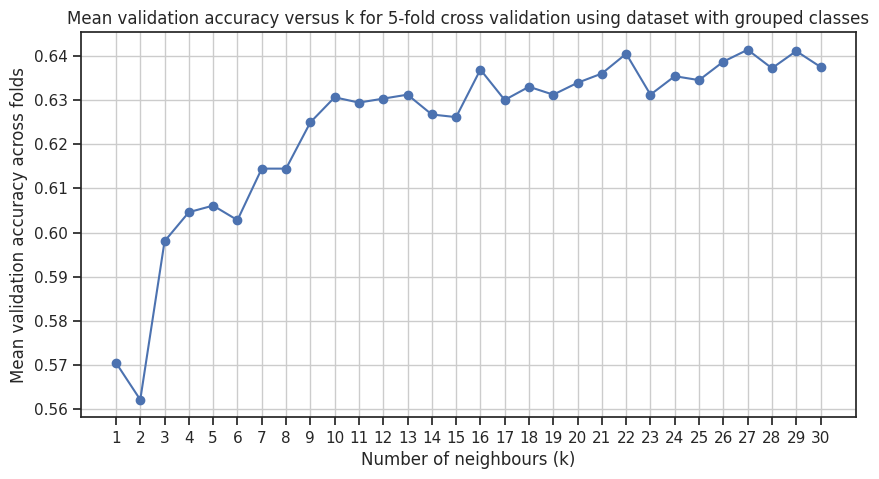

In [24]:
#Plot the results
plt.figure(figsize= (10,5))
plt.title("Mean validation accuracy versus k for 5-fold cross validation using dataset with grouped classes")
plt.plot(k_list,scores, marker = 'o')
plt.xlabel("Number of neighbours (k)")
plt.ylabel("Mean validation accuracy across folds")
plt.xticks(k_list)
plt.grid()
plt.show()

In [25]:
#Retrain KNN using the best k found
best_k = k_list[np.argmax(scores)]
abalone_best_k = best_k

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train_grouped, y_train_grouped)
test_acc = knn.score(X_test_grouped, y_test_grouped)

print("Best k value found with 5-fold cross validation: k =", best_k)
print("Test accuracy with k =",best_k, ": ", test_acc)

Best k value found with 5-fold cross validation: k = 27
Test accuracy with k = 27 :  0.6543062200956937


In [26]:
#Weighted KNN
weighted_knn = KNeighborsClassifier(n_neighbors = best_k, weights = "distance")
weighted_knn.fit(X_train_grouped, y_train_grouped)
test_acc = weighted_knn.score(X_test_grouped, y_test_grouped)

abalone_knn_acc = test_acc

print("Test accuracy using weighted KNN with k =", best_k, ":", test_acc)

clf_report = classification_report(y_test_grouped, weighted_knn.predict(X_test_grouped))
print("Classification Report:")
print(clf_report)

Test accuracy using weighted KNN with k = 27 : 0.6602870813397129
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       286
           1       0.51      0.58      0.54       261
           2       0.74      0.65      0.69       289

    accuracy                           0.66       836
   macro avg       0.66      0.66      0.66       836
weighted avg       0.67      0.66      0.66       836



# 3. Decision Tree Classifier with unbalanced dataset

In [27]:
#Try different values for max depth of decision tree with grid search
params = {"max_depth": [i for i in range(2,21)]}
dt_classifier = DecisionTreeClassifier()
grid_search_cv = GridSearchCV(dt_classifier, params, cv = 5)
grid_search_cv.fit(X_train, y_train)

best_max_depth = grid_search_cv.best_params_["max_depth"]

scores = grid_search_cv.cv_results_["mean_test_score"]

print("Best max depth of tree: ", best_max_depth)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best max depth of tree:  4


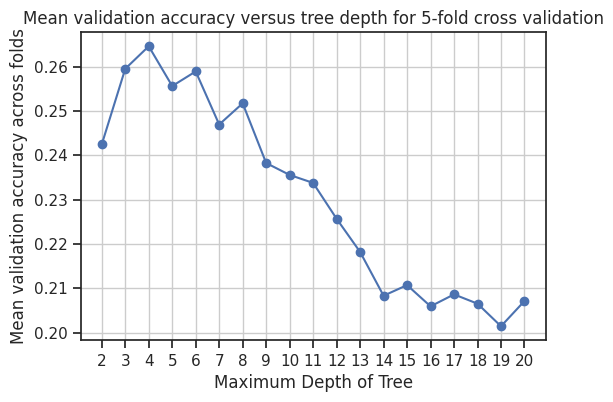

In [28]:
#Plot the results
plt.figure(figsize= (6,4))
plt.title("Mean validation accuracy versus tree depth for 5-fold cross validation")
plt.plot(params["max_depth"], scores, marker = 'o')
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Mean validation accuracy across folds")
plt.xticks(params["max_depth"])
plt.grid()
plt.show()

In [29]:
#Find the test accuracy
dt_classifier = DecisionTreeClassifier(max_depth = best_max_depth)
dt_classifier.fit(X_train, y_train)
test_acc = dt_classifier.score(X_test, y_test)
print("Test accuracy with maximum tree depth =", best_max_depth , ": ", test_acc)

Test accuracy with maximum tree depth = 4 :  0.24401913875598086


In [30]:
#Visualize decision tree

#plt.figure(figsize=(120,30))
#plot_tree(grid_search_cv.best_estimator_, feature_names = X.columns, class_names = y.unique().astype(str), filled = True, fontsize = 30)
#plt.show()

#Text version of decision tree
#print(export_text(grid_search_cv.best_estimator_, feature_names = X.columns, class_names = y.unique().astype(str)))

# 3. Repeat the above Decision Tree Experiments using the dataset with grouped classes

In [31]:
#Try different values for max depth of decision tree with grid search
params = {"max_depth": [i for i in range(2,21)]}
dt_classifier = DecisionTreeClassifier()
grid_search_cv = GridSearchCV(dt_classifier, params, cv = 5)
grid_search_cv.fit(X_train_grouped, y_train_grouped)

best_max_depth = grid_search_cv.best_params_["max_depth"]

abalone_best_depth_dt = best_max_depth

scores = grid_search_cv.cv_results_["mean_test_score"]

print("Best max depth of tree: ", best_max_depth)

Best max depth of tree:  5


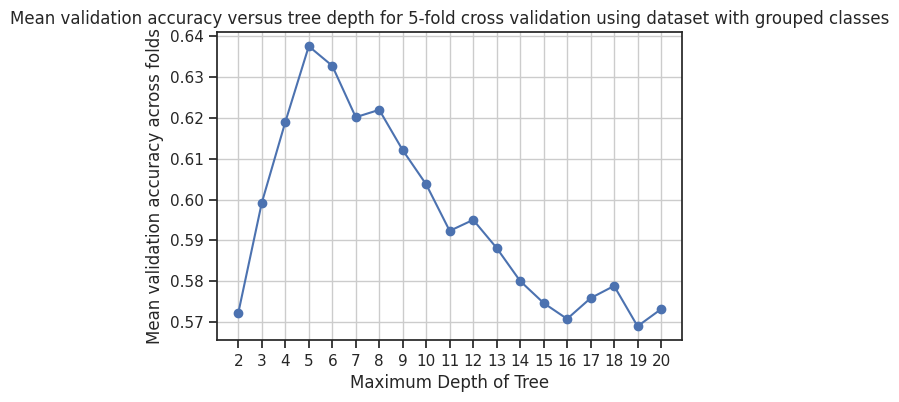

In [32]:
#Plot the results
plt.figure(figsize= (6,4))
plt.title("Mean validation accuracy versus tree depth for 5-fold cross validation using dataset with grouped classes")
plt.plot(params["max_depth"], scores, marker = 'o')
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Mean validation accuracy across folds")
plt.xticks(params["max_depth"])
plt.grid()
plt.show()

In [33]:
#Find the test accuracy
dt_classifier = DecisionTreeClassifier(max_depth = best_max_depth)
dt_classifier.fit(X_train_grouped, y_train_grouped)
test_acc = dt_classifier.score(X_test_grouped, y_test_grouped)

abalone_dt_acc = test_acc
print("Test accuracy with maximum tree depth =", best_max_depth , ": ", test_acc)

clf_report = classification_report(y_test_grouped, dt_classifier.predict(X_test_grouped))
print("Classification Report:")
print(clf_report)

Test accuracy with maximum tree depth = 5 :  0.6255980861244019
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       286
           1       0.47      0.56      0.51       261
           2       0.67      0.56      0.61       289

    accuracy                           0.63       836
   macro avg       0.63      0.62      0.63       836
weighted avg       0.64      0.63      0.63       836



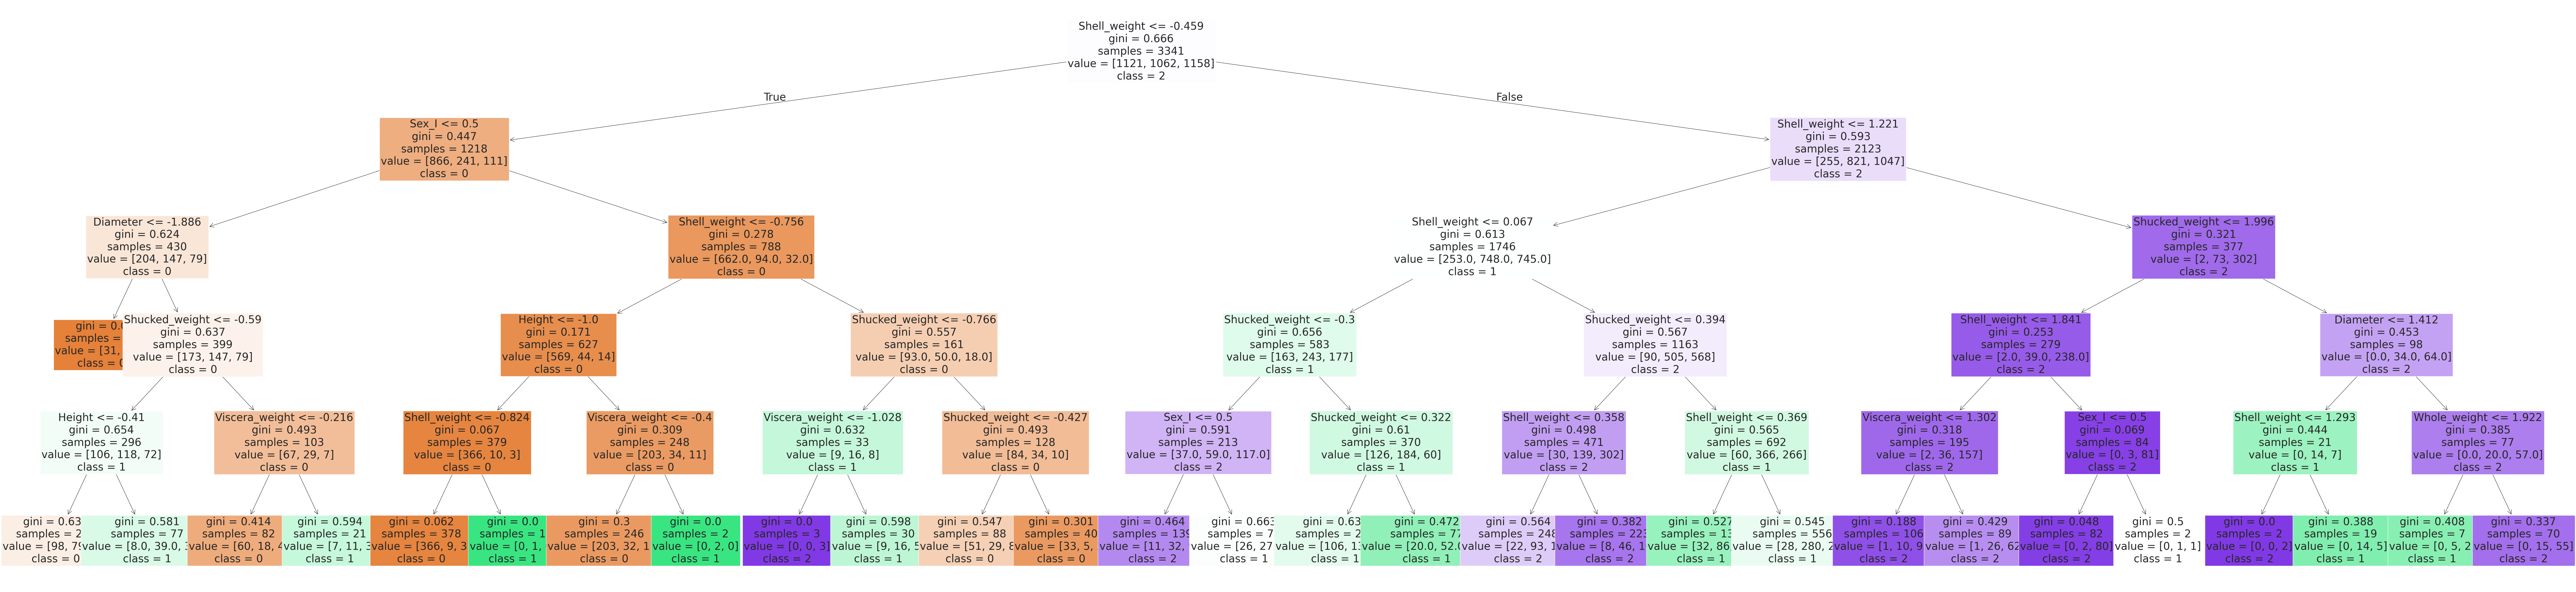

In [34]:
#Visualize decision tree

plt.figure(figsize=(130,30))
plot_tree(dt_classifier, feature_names = X_grouped.columns, class_names = ["0","1","2"], filled = True, fontsize = 30)
plt.show()

In [35]:
#Text version of decision tree
print(export_text(grid_search_cv.best_estimator_, feature_names = X_grouped.columns, class_names = ["0","1","2"]))

|--- Shell_weight <= -0.46
|   |--- Sex_I <= 0.50
|   |   |--- Diameter <= -1.89
|   |   |   |--- class: 0
|   |   |--- Diameter >  -1.89
|   |   |   |--- Shucked_weight <= -0.59
|   |   |   |   |--- Height <= -0.41
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Height >  -0.41
|   |   |   |   |   |--- class: 1
|   |   |   |--- Shucked_weight >  -0.59
|   |   |   |   |--- Viscera_weight <= -0.22
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Viscera_weight >  -0.22
|   |   |   |   |   |--- class: 1
|   |--- Sex_I >  0.50
|   |   |--- Shell_weight <= -0.76
|   |   |   |--- Height <= -1.00
|   |   |   |   |--- Shell_weight <= -0.82
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Shell_weight >  -0.82
|   |   |   |   |   |--- class: 1
|   |   |   |--- Height >  -1.00
|   |   |   |   |--- Viscera_weight <= -0.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Viscera_weight >  -0.40
|   |   |   |   |   |--- class: 1
|   |   |--- Shell_weight >  -0.76
|   |   |

# 4. Random Forest Classifier with unbalanced dataset

In [36]:
#n_estimators is number of trees
params = {"n_estimators": [i for i in range(3,101,20)], "max_depth":[j for j in range(3,11)]}
rf_classifier = RandomForestClassifier()
grid_search_cv = GridSearchCV(rf_classifier, params, cv = 5)
grid_search_cv.fit(X_train, y_train)

best_num_trees = grid_search_cv.best_params_["n_estimators"]
best_max_depth = grid_search_cv.best_params_["max_depth"]

scores = grid_search_cv.cv_results_["mean_test_score"]

print("Best number of trees:", best_num_trees)
print("Best max depth of tree:", best_max_depth)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best number of trees: 63
Best max depth of tree: 7


<Axes: title={'center': 'Mean Accuracy for parameter combinations'}, xlabel='param_max_depth', ylabel='param_n_estimators'>

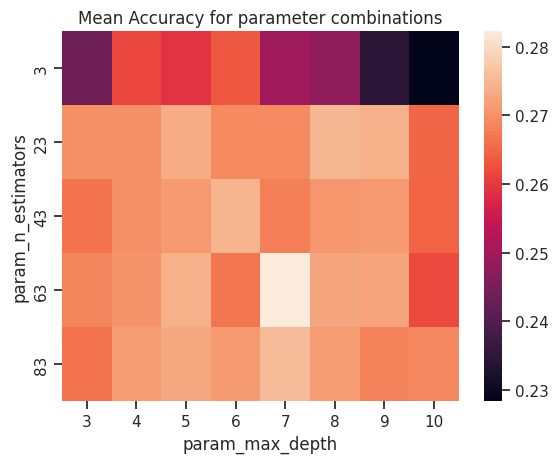

In [37]:
#Produce heatplot

result_df = pd.DataFrame(grid_search_cv.cv_results_)[["param_max_depth","param_n_estimators","mean_test_score"]]

#Reference used: https://seaborn.pydata.org/examples/spreadsheet_heatmap.html [4]
result_df = result_df.pivot(columns = "param_max_depth", index = "param_n_estimators", values = "mean_test_score")

result_df
plt.title("Mean Accuracy for parameter combinations")
plt.xlabel("Maximum depth of trees")
plt.ylabel("Number of trees")
sns.heatmap(result_df)

In [38]:
#Find the test accuracy
rf_classifier = RandomForestClassifier(n_estimators = best_num_trees, max_depth = best_max_depth)
rf_classifier.fit(X_train, y_train)
test_acc = rf_classifier.score(X_test, y_test)
print("Test accuracy with", best_num_trees, "trees and maximum depth of trees =", best_max_depth, ":", test_acc)

Test accuracy with 63 trees and maximum depth of trees = 7 : 0.2583732057416268


# 4. Repeat the above Random Forest Experiments using the dataset with grouped classes

In [39]:
#n_estimators is number of trees
params = {"n_estimators": [i for i in range(3,101,20)], "max_depth":[j for j in range(3,11)]}
rf_classifier = RandomForestClassifier()
grid_search_cv = GridSearchCV(rf_classifier, params, cv = 5)
grid_search_cv.fit(X_train_grouped, y_train_grouped)

best_num_trees = grid_search_cv.best_params_["n_estimators"]
best_max_depth = grid_search_cv.best_params_["max_depth"]

abalone_best_numtrees_rf = best_num_trees
abalone_best_depth_rf = best_max_depth

scores = grid_search_cv.cv_results_["mean_test_score"]

print("Best number of trees:", best_num_trees)
print("Best max depth of tree:", best_max_depth)

Best number of trees: 63
Best max depth of tree: 7


<Axes: title={'center': 'Mean Accuracy for parameter combinations using dataset with grouped classes'}, xlabel='param_max_depth', ylabel='param_n_estimators'>

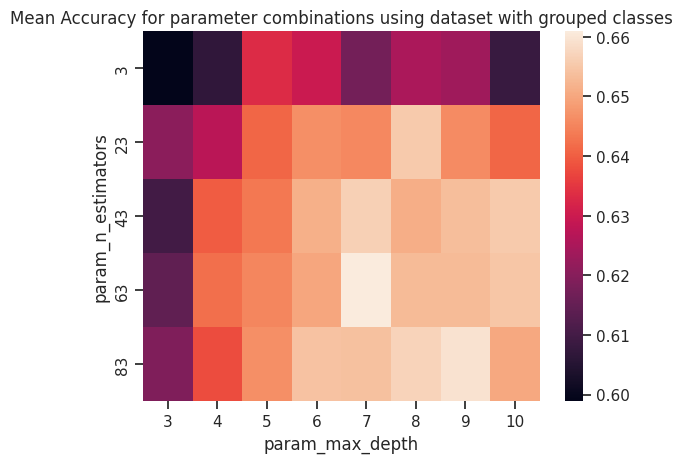

In [40]:
#Produce heatplot

result_df = pd.DataFrame(grid_search_cv.cv_results_)[["param_max_depth","param_n_estimators","mean_test_score"]]

#Reference used: https://seaborn.pydata.org/examples/spreadsheet_heatmap.html [4]
result_df = result_df.pivot(columns = "param_max_depth", index = "param_n_estimators", values = "mean_test_score")

result_df
plt.title("Mean Accuracy for parameter combinations using dataset with grouped classes")
plt.xlabel("Maximum depth of trees")
plt.ylabel("Number of trees")
sns.heatmap(result_df)

In [41]:
#Find the test accuracy
rf_classifier = RandomForestClassifier(n_estimators = best_num_trees, max_depth = best_max_depth)
rf_classifier.fit(X_train_grouped, y_train_grouped)
test_acc = rf_classifier.score(X_test_grouped, y_test_grouped)

abalone_rf_acc = test_acc

print("Test accuracy with", best_num_trees, "trees and maximum depth of trees =", best_max_depth, ":", test_acc)

clf_report = classification_report(y_test_grouped, rf_classifier.predict(X_test_grouped))
print("Classification Report:")
print(clf_report)

Test accuracy with 63 trees and maximum depth of trees = 7 : 0.6698564593301436
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       286
           1       0.52      0.53      0.53       261
           2       0.71      0.67      0.69       289

    accuracy                           0.67       836
   macro avg       0.67      0.67      0.67       836
weighted avg       0.67      0.67      0.67       836



# 5. Results Table

In [42]:
# Create the results dictionary
results = {
    "Model": ["kNN", "Decision Tree", "Random Forest"],
    "Best Settings for wine dataset": ["k=12", "max_depth=11", "n_estimators=50, max_depth=10"],
    "Wine": [0.9938, 0.9138, 0.9946],
    "Best Settings for abalone dataset":
     ["k = "+str(abalone_best_k),"max_depth = "+str(abalone_best_depth_dt),"n_estimators = "+str(abalone_best_numtrees_rf)+", max_depth = "+str(abalone_best_depth_rf)],
    "Abalone ": [abalone_knn_acc, abalone_dt_acc, abalone_rf_acc]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(results)

# Display the table
print(df)



           Model Best Settings for wine dataset    Wine  \
0            kNN                           k=12  0.9938   
1  Decision Tree                   max_depth=11  0.9138   
2  Random Forest  n_estimators=50, max_depth=10  0.9946   

  Best Settings for abalone dataset  Abalone   
0                            k = 27  0.660287  
1                     max_depth = 5  0.625598  
2  n_estimators = 63, max_depth = 7  0.669856  


# References

[1] W. Nash, T. Sellers, S. Talbot, A. Cawthorn, and W. Ford. "Abalone," UCI Machine Learning Repository, 1994. [Online]. Available: https://doi.org/10.24432/C55C7W.

[2] D. Clark, Z. Schreter, and A. Adams, "A Quantitative Comparison of Dystal and Backpropagation," in *Australian Conference on Neural Networks*, *1996*.

[3] C. Custer, “Tutorial: Add a Column to a Pandas DataFrame Based on an If-Else Condition,” Dataquest, https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/ (accessed Feb. 7, 2025).

[4] “Annotated heatmaps,” Annotated heatmaps - seaborn 0.13.2 documentation, https://seaborn.pydata.org/examples/spreadsheet_heatmap.html (accessed Feb. 7, 2025).
